In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from standard_config import *

In [2]:
gwl = pd.read_csv("{}/data/auxillary_data/GWL.csv".format(local_home_path))

In [3]:
case_dates_2013 = pd.read_csv("{}/2019-01_trackingstudie/HACI_cases_manually_classified.csv".format(proj_path))

In [3]:
isolated_cases = pd.read_csv("{}/2019-01_trackingstudie/data/isolated_tracks_2008-2017.csv".format(proj_path))

In [4]:
dates = []

for i, row in isolated_cases.iterrows():
    d = row.case_id.split("_")[0]
    dates.append(d)

In [5]:
dates = np.unique(np.array(dates))

In [5]:
# haci_objects = pd.read_csv("{}/HACI_bbox_data/haci_objects_filtered.csv".format(local_data_path))
# haci_objects = haci_objects.assign(date=pd.to_datetime(haci_objects['date'].astype(str) + 'T' + haci_objects['time'],utc=True))

/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/dateutil/parser/_parser.py:1206: UnknownTimezoneWarning: tzname T identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [4]:
# case_dates_2013['date'] = case_dates_2013.case_id.str.split("_", n = 1, expand = True)[0]

In [6]:
#dates = case_dates_2013.date.unique()
#dates = haci_objects.date.unique()

In [6]:
date_gwl = []

for d in dates:
    g = gwl[gwl.date==int(d)]
    date_gwl.append(g.iloc[0].GWL)   

In [7]:
date_gwl = pd.DataFrame({'date':dates, 'gwl':date_gwl})

In [8]:
object_gwl_counts = date_gwl.gwl.value_counts() / date_gwl.gwl.value_counts().sum()

Text(0.5, 1.0, 'Large scale weather patterns of cases 2008 to 2013')

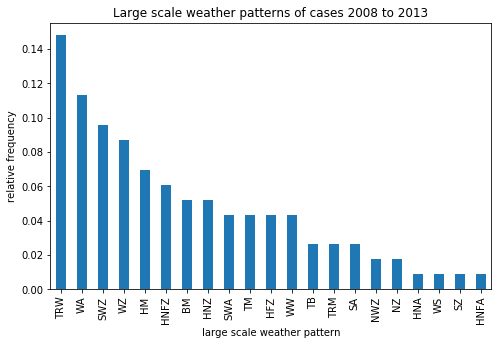

In [9]:
fig,ax = plt.subplots(1,1,figsize=(7.9,4.9))
object_gwl_counts.plot(kind='bar',ax=ax)
ax.set_xlabel("large scale weather pattern")
ax.set_ylabel("relative frequency")
ax.set_title("Large scale weather patterns of cases 2008 to 2013")

In [10]:
date_gwl.gwl.value_counts() / date_gwl.gwl.value_counts().sum()

TRW     0.147826
WA      0.113043
SWZ     0.095652
WZ      0.086957
HM      0.069565
HNFZ    0.060870
BM      0.052174
HNZ     0.052174
SWA     0.043478
TM      0.043478
HFZ     0.043478
WW      0.043478
TB      0.026087
TRM     0.026087
SA      0.026087
NWZ     0.017391
NZ      0.017391
HNA     0.008696
WS      0.008696
SZ      0.008696
HNFA    0.008696
Name: gwl, dtype: float64

In [11]:
years = []

for i,r in gwl.iterrows():
    years.append(str(r.date)[0:4])

In [12]:
gwl = gwl.assign(year=years)

In [13]:
gwl.head()

,date,GWL,year
0,20080101,TRM,2008
1,20080102,SEA,2008
2,20080103,SEA,2008
3,20080104,SEA,2008
4,20080105,WW,2008


In [14]:
#gwl_2013_vcount = gwl_2013.GWL.value_counts()
gwl_vcount = gwl.GWL.value_counts()

In [15]:
#gwl_2013_vcount_rel = gwl_2013_vcount / gwl_2013_vcount.sum()
gwl_vcount_rel = gwl_vcount / gwl_vcount.sum()

In [16]:
gwl_vcount_rel


WZ      0.117810
BM      0.092439
TRM     0.086159
TRW     0.070836
WA      0.066315
SWZ     0.063552
HM      0.053002
NWZ     0.044210
NWA     0.031650
HNZ     0.031148
HNFZ    0.028385
SWA     0.028134
WW      0.026626
HFA     0.024617
TB      0.024366
WS      0.022356
HFZ     0.021100
HB      0.019342
TM      0.018839
NEZ     0.018839
SA      0.017332
HNA     0.015323
SEA     0.013313
SEZ     0.013062
NEA     0.012560
NZ      0.012560
SZ      0.012560
Ü       0.008289
HNFA    0.005275
Name: GWL, dtype: float64

Text(0.5, 1.0, 'Large scale weather patterns of 2008 to 2013')

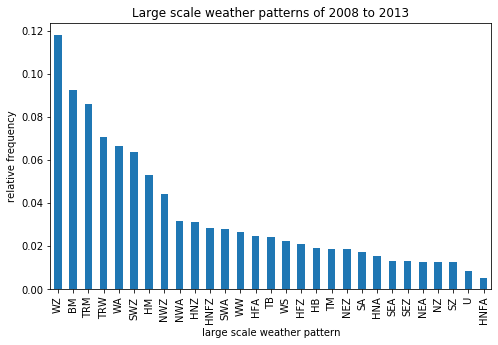

In [17]:
fig,ax = plt.subplots(1,1,figsize=(7.9,4.9))
gwl_vcount_rel.plot(kind='bar',ax=ax)
ax.set_xlabel("large scale weather pattern")
ax.set_ylabel("relative frequency")
ax.set_title("Large scale weather patterns of 2008 to 2013")

In [18]:
gwl_vcount

WZ      469
BM      368
TRM     343
TRW     282
WA      264
SWZ     253
HM      211
NWZ     176
NWA     126
HNZ     124
HNFZ    113
SWA     112
WW      106
HFA      98
TB       97
WS       89
HFZ      84
HB       77
TM       75
NEZ      75
SA       69
HNA      61
SEA      53
SEZ      52
NEA      50
NZ       50
SZ       50
Ü        33
HNFA     21
Name: GWL, dtype: int64

In [19]:
date_gwl.gwl.value_counts()

TRW     17
WA      13
SWZ     11
WZ      10
HM       8
HNFZ     7
BM       6
HNZ      6
SWA      5
TM       5
HFZ      5
WW       5
TB       3
TRM      3
SA       3
NWZ      2
NZ       2
HNA      1
WS       1
SZ       1
HNFA     1
Name: gwl, dtype: int64

In [20]:
date_gwl.gwl.value_counts()/ gwl_vcount

BM      0.016304
HB           NaN
HFA          NaN
HFZ     0.059524
HM      0.037915
HNA     0.016393
HNFA    0.047619
HNFZ    0.061947
HNZ     0.048387
NEA          NaN
NEZ          NaN
NWA          NaN
NWZ     0.011364
NZ      0.040000
SA      0.043478
SEA          NaN
SEZ          NaN
SWA     0.044643
SWZ     0.043478
SZ      0.020000
TB      0.030928
TM      0.066667
TRM     0.008746
TRW     0.060284
WA      0.049242
WS      0.011236
WW      0.047170
WZ      0.021322
Ü            NaN
dtype: float64

In [21]:
ratio = date_gwl.gwl.value_counts()/gwl_vcount

In [22]:
ratio

BM      0.016304
HB           NaN
HFA          NaN
HFZ     0.059524
HM      0.037915
HNA     0.016393
HNFA    0.047619
HNFZ    0.061947
HNZ     0.048387
NEA          NaN
NEZ          NaN
NWA          NaN
NWZ     0.011364
NZ      0.040000
SA      0.043478
SEA          NaN
SEZ          NaN
SWA     0.044643
SWZ     0.043478
SZ      0.020000
TB      0.030928
TM      0.066667
TRM     0.008746
TRW     0.060284
WA      0.049242
WS      0.011236
WW      0.047170
WZ      0.021322
Ü            NaN
dtype: float64

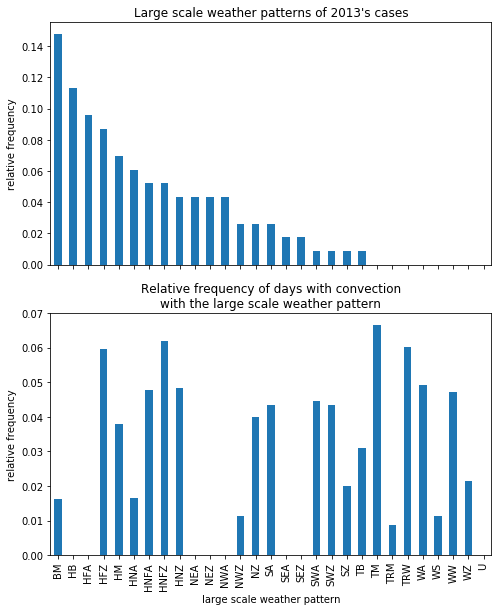

In [46]:
fig,ax = plt.subplots(2,1,figsize=(7.9,9.8),sharex=True)
object_gwl_counts.plot(kind='bar',ax=ax[0],x='GWL')
ax[0].set_xlabel("large scale weather pattern")
ax[0].set_ylabel("relative frequency")
ax[0].set_title("Large scale weather patterns of 2013's cases")

#fig,ax = plt.subplots(1,1,figsize=(7.9,4.9))
ratio.plot(kind='bar',ax=ax[1],x='GWL')
ax[1].set_xlabel("large scale weather pattern")
ax[1].set_ylabel("relative frequency")
ax[1].set_title("Relative frequency of days with convection\nwith the large scale weather pattern")
plt.savefig("{}/pics/GWL_plot.pdf".format(local_home_path))

In [27]:
from io import StringIO

In [28]:
data = StringIO("""
    gwl,"frequency of days with cases","LSWP of cases"
BM,0.016304,0.052174
HB,NaN,NaN
HFA,NaN,NaN
HFZ,0.059524,0.043478
HM,0.037915,0.069565
HNA,0.016393,0.008696
HNFA,0.047619,0.008696
HNFZ,0.061947,0.060870
HNZ,0.048387,0.052174
NEA,NaN,NaN
NEZ,NaN,NaN
NWA,NaN,NaN
NWZ,0.011364,0.017391
NZ,0.040000,0.017391
SA,0.043478,0.026087
SEA,NaN,NaN
SEZ,NaN,NaN
SWA,0.044643,0.043478
SWZ,0.043478,0.095652
SZ,0.020000,0.008696
TB,0.030928,0.026087
TM,0.066667,0.043478
TRM,0.008746,0.026087
TRW,0.060284,0.147826
WA,0.049242,0.113043
WS,0.011236,0.008696
WW,0.047170,0.043478
WZ,0.021322,0.086957
Ü,NaN,NaN

""")

In [29]:
data = pd.read_csv(data, index_col=0, delimiter=',', skipinitialspace=True)

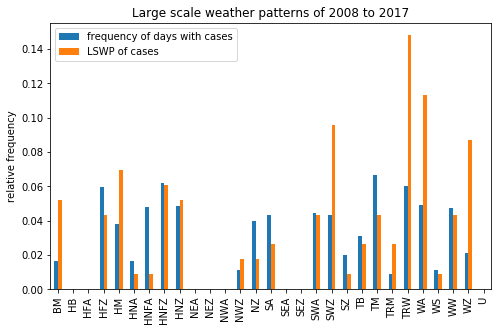

In [30]:
fig,ax = plt.subplots(1,1,figsize=(7.9,4.9),sharex=True)
data.plot(kind='bar',ax=ax)
ax.set_xlabel("")
ax.set_ylabel("relative frequency")
ax.set_title("Large scale weather patterns of 2008 to 2017")
plt.savefig("{}/pics/GWL_plot.pdf".format(local_home_path))

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(7.9,4.9))
object_gwl_counts.plot(kind='bar',ax=ax)
ax.set_xlabel("large scale weather pattern")
ax.set_ylabel("relative frequency")
ax.set_title("Large scale weather patterns of 2013's cases")

In [4]:
def labels(from_, to_, step_):
    return pd.Series(np.arange(from_, to_ + step_, step_)).apply(lambda x: '{:,}'.format(x)).tolist()

def breaks(from_, to_, step_):
    return pd.Series(np.arange(from_, to_ + step_, step_)).tolist()

In [6]:
data = pd.read_csv(c_remote_data)

data = (
    data.filter([
        'abv',
        'ibu',
        'id',
        'name',
        'style',
        'brewery_id',
        'ounces'
    ]).
    set_index('id')
)

In [13]:
fig = (
    ggplot(data.dropna(subset = ['abv'])) +
    geom_histogram(
        aes(x = 'abv'),
        fill = c_col[0], color = 'black'
    ) +
    labs(
        title ='Distribution of The alcoholic content by volume (abv)',
        x = 'abv - The alcoholic content by volume',
        y = 'Count',
    ) +
    scale_x_continuous(
        limits = (0, 0.14),
        labels = labels(0, 0.14, 0.02),
        breaks = breaks(0, 0.14, 0.02)
    ) +
    scale_y_continuous(
        limits = (0, 350),
        labels = labels(0, 350, 50),
        breaks = breaks(0, 350, 50)
    )
)

/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 50'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


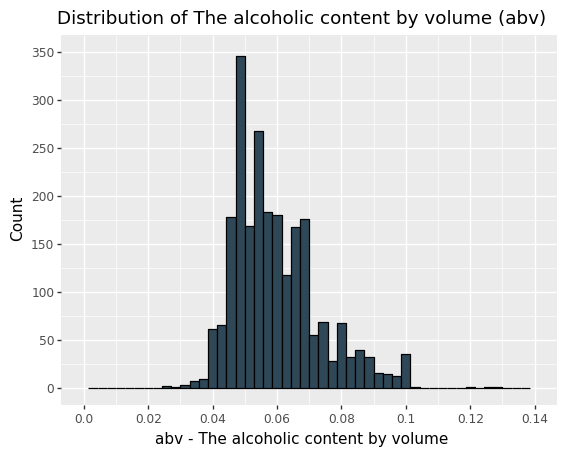

<ggplot: (8732044739629)>

In [14]:
fig

In [18]:
data['ounces_str'] = data['ounces']
data['ounces_str'] = data['ounces_str'].apply(str)
fig = (
    ggplot(data.dropna(subset = ['abv'])) +
    geom_point(
        aes(x = 'abv',
            y = 'ibu',
            fill = 'ounces_str'),
        alpha = 0.5,
        color = 'black'
    ) +
    
    geom_smooth(
        aes(x = 'abv',
            y = 'ibu')
    ) +
    labs(
        title ='Relationship between alcoholic content (abv) and int. bittering untis (ibu)',
        x = 'abv - The alcoholic content by volume',
        y = 'ibu - International bittering units',
    ) +
    scale_fill_manual(
        name = 'Ounces',
        values = c_col) +
    scale_x_continuous(
        limits = (0, 0.14),
        labels = labels(0, 0.14, 0.02),
        breaks = breaks(0, 0.14, 0.02)
    )  +
    scale_y_continuous(
        limits = (0, 150),
        labels = labels(0, 150, 30),
        breaks = breaks(0, 150, 30)
    )
)

/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 943 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


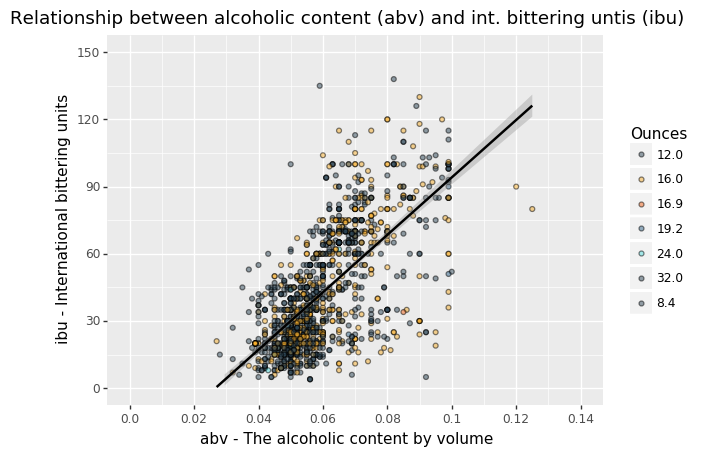

<ggplot: (8732044475509)>

In [19]:
fig

In [20]:
fig = (
    ggplot(data.dropna(subset = ['abv'])) +
    geom_bin2d(
        aes(x = 'abv',
            y = 'ibu')
    ) +
    labs(
        title ='Relationship between alcoholic content (abv) and int. bittering untis (ibu)',
        x = 'abv - The alcoholic content by volume',
        y = 'ibu - International bittering units',
    ) +
    scale_x_continuous(
        limits = (0, 0.14),
        labels = labels(0, 0.14, 0.02),
        breaks = breaks(0, 0.14, 0.02)
    )  +
    scale_y_continuous(
        limits = (0, 150),
        labels = labels(0, 150, 30),
        breaks = breaks(0, 150, 30)
    ) +
    theme(figure_size = (8, 8))
)

/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_bin_2d : Removed 943 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


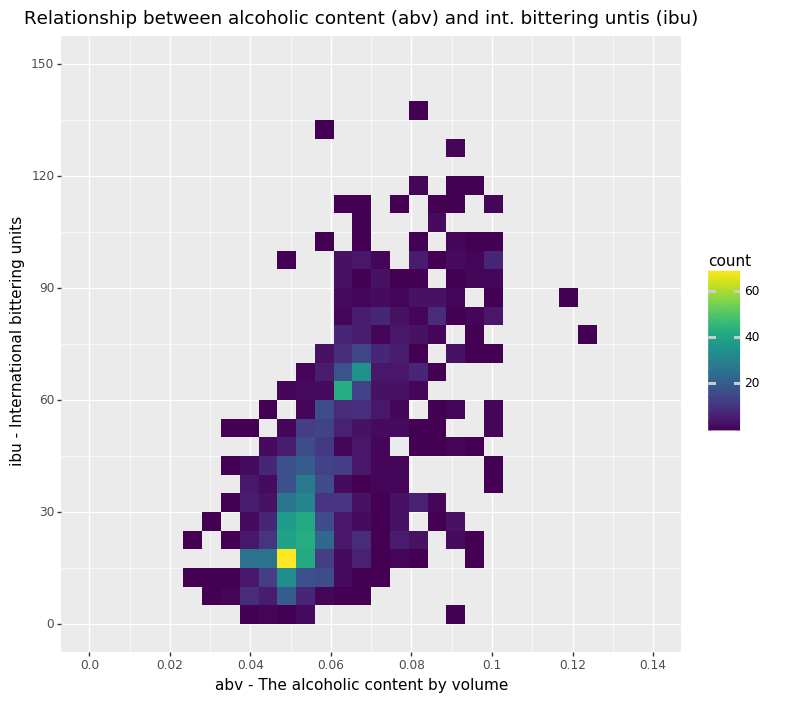

<ggplot: (8732042204473)>

In [21]:
fig

In [24]:
fig = (
    ggplot(data.dropna(subset = ['abv'])) +
    geom_boxplot(
        aes(x = 'ounces_str',
            y = 'abv'),
        fill = c_col[0]
    ) +
    labs(
        title ='Distribution of alcoholic content (abv) by size',
        x = 'size in ounces',
        y = 'abv - The alcoholic content by volume',
    ) +
    scale_y_continuous(
        limits = (0, 0.14),
        labels = labels(0, 0.14, 0.02),
        breaks = breaks(0, 0.14, 0.02)
    )
)

/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/plotnine/stats/stat.py:311: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)


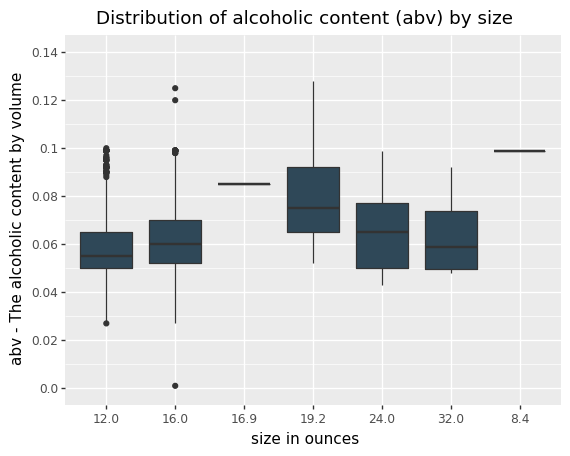

<ggplot: (8732042204493)>

In [25]:
fig